In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cifar10 = keras.datasets.cifar10  #it load the dataset from keras
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()  #split datas into testing and training

In [ ]:
train_images.shape #as you can see we have 50.000 images and they're 32*32 pixels and every pixels has 3 different channels in each image (Red, Green, Blue - RGB)

(50000, 32, 32, 3)

In [ ]:
train_images[0,15,15] # Let's look at one pixel btw this indicates that the pixel at the specified location has the following RGB values:
#0 is stands for Index of the image in the dataset
#first 15 is stands for row index of the pixel
#second 15 is stands for column index of the pixel

array([247, 234, 212], dtype=uint8)

In [ ]:
train_labels[:10]  #let's have a look at the first 10 training labels

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

<function matplotlib.pyplot.show(close=None, block=None)>

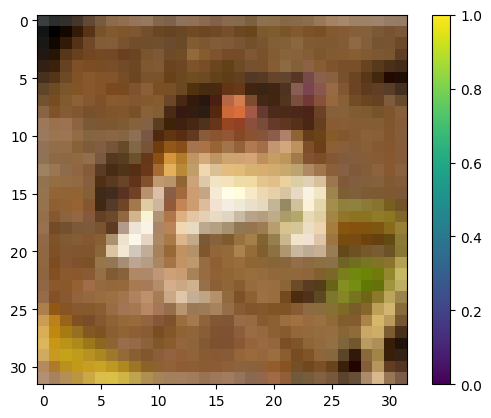

In [ ]:
plt.figure()
plt.imshow(train_images[0]) #with al this code block we see the how image look like in this index
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0 # In this place we preprocess our data. In this case we scale all our pixel values to between 0 and 1.
# We do this because smaller values will make it easier for the model to process our values.

In [ ]:
# For building the model we use keras sequential model with 3 layers.
# CIFAR-10 dataset için uygun model
model = keras.Sequential([
    #we're flatten our layer shape so each pixel will be associated with one neuron
    keras.layers.Flatten(input_shape=(32, 32, 3)),  # input layer
    #this layer will be fullt connected and each neuron from the previous layer connects to each neuron of this layer
    keras.layers.Dense(128, activation='relu'),     # hidden layer
    # Each neuron represnts the probabillity of a given image being one of the 10 different classes.
    # The activation function softmax is used on this layer to calculate a probabillity distribution for each class.
    # This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.
    keras.layers.Dense(10, activation='softmax')    # output layer
])


In [ ]:
#Now we're compiling our model
model.compile(optimizer = 'adam',
                              loss ='sparse_categorical_crossentropy',
                              metrics = ['accuracy'])

In [ ]:
#Now we're training our model
#fit stands for fitting it to the training data so for training
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4394 - accuracy: 0.4903
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4372 - accuracy: 0.4890
Epoch 3/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4351 - accuracy: 0.4891
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4353 - accuracy: 0.4913
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4336 - accuracy: 0.4913


In [ ]:
#Now we're testing our model
#verbose means how much we're printing out to the console
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.5613 - accuracy: 0.4509
Test accuracy: 0.45089998841285706


In [ ]:
predictions = model.predict(test_images)
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[2.01791376e-02 3.01004928e-02 5.49689420e-02 ... 2.07719542e-02
  2.17807889e-01 6.58750767e-03]
 [2.00363062e-02 1.69180289e-01 2.45741475e-03 ... 2.45999149e-03
  1.04874894e-01 6.99848711e-01]
 [2.16229424e-01 2.03653499e-01 9.11040790e-03 ... 1.43134163e-03
  3.91371429e-01 1.70699984e-01]
 ...
 [2.56265188e-03 5.11811639e-04 1.27874300e-01 ... 7.10928887e-02
  2.17934698e-03 2.85891304e-03]
 [5.99638745e-02 3.43756145e-03 3.61781329e-01 ... 3.34462643e-01
  2.38622143e-03 2.06533680e-03]
 [4.77801338e-02 6.23619277e-03 8.34926516e-02 ... 4.02522564e-01
  4.29391954e-03 9.67507623e-03]]


313/313 [==============================] - 1s 2ms/step
Cat


<function matplotlib.pyplot.show(close=None, block=None)>

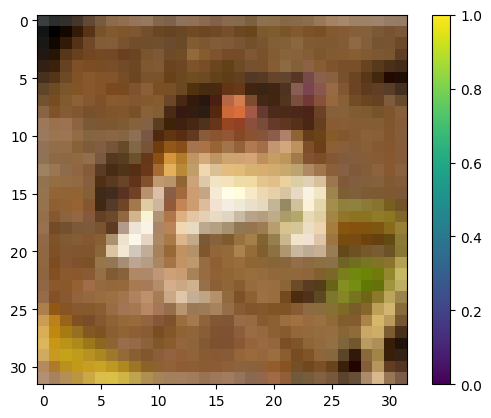

In [ ]:
#And in this it return the index of the maximum value in this list
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

Pick a number: 2
1/1 [==============================] - 0s 20ms/step


<ipython-input-88-55fa2ccedc42>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  show_image(image, class_names[int(correct_label)], predicted_class)


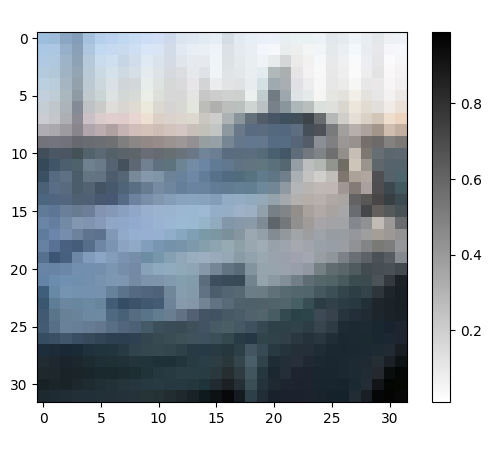

In [ ]:
#It let us use our model to actually make predictions on any entry that we want.
#It take number from us and it's going to find that image in the test data set.
#It gonna make your prediction from the model and show us what it actually is versus what it was predicted being
# Renk ayarları
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[int(correct_label)], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num < len(test_images):
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)